### Deskripsi Dataset dan Tujuan Analisis
Dataset berisi data absensi dan nilai siswa. Tujuan analisis adalah mengklasifikasikan performa siswa menggunakan sistem fuzzy (Mamdani & Sugeno) serta membandingkan kinerjanya.

In [1]:
# Import Library
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mengimpor dataset
df = pd.read_csv("./data/dataset_siswa.csv")

# Memeriksa apakah ada missing values di dataset
print("\nMissing Values per Kolom:")
print(df.isnull().sum())

# Jika ada missing values, kita bisa mengisinya dengan rata-rata kolom masing-masing
df['absensi'] = df['absensi'].fillna(df['absensi'].mean())
df['nilai'] = df['nilai'].fillna(df['nilai'].mean())

# Memeriksa kembali setelah pengisian missing values
print("\nDataset Setelah Penanganan Missing Values:")
print(df.isnull().sum())

# Menampilkan informasi dasar dari dataset
print("\nInformasi Dataset:")
print(df.info())

# Menampilkan statistik deskriptif untuk atribut numerik
print("\nStatistik Deskriptif Dataset:")
print(df.describe())



Missing Values per Kolom:
absensi    0
nilai      0
dtype: int64

Dataset Setelah Penanganan Missing Values:
absensi    0
nilai      0
dtype: int64

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   absensi  499 non-null    int64
 1   nilai    499 non-null    int64
dtypes: int64(2)
memory usage: 7.9 KB
None

Statistik Deskriptif Dataset:
          absensi       nilai
count  499.000000  499.000000
mean    48.382766   49.106212
std     29.482412   28.829487
min      0.000000    0.000000
25%     22.000000   22.500000
50%     49.000000   50.000000
75%     73.000000   74.000000
max    100.000000  100.000000


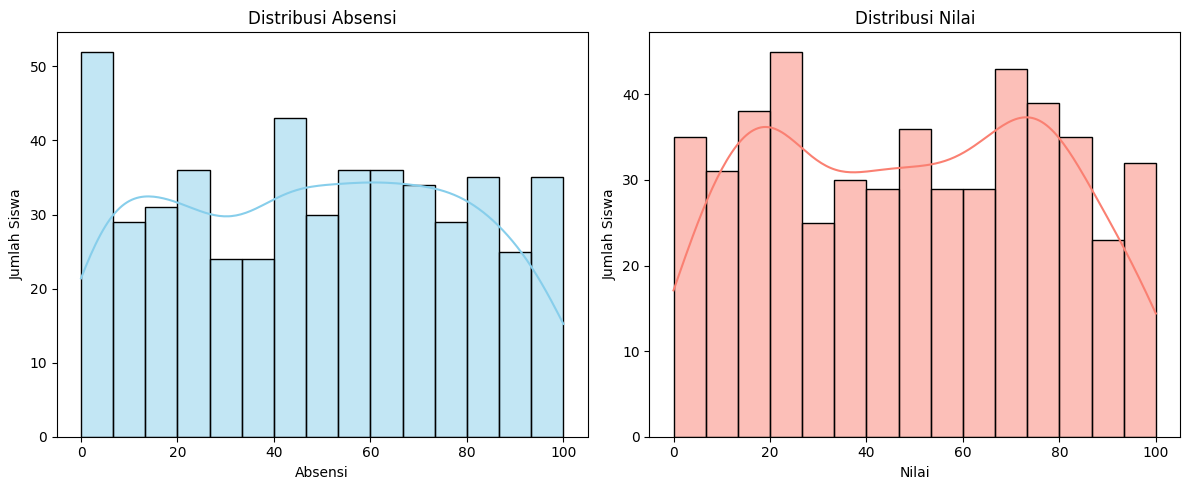

In [3]:
# Cell 3: Visualisasi Distribusi Data
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['absensi'], kde=True, bins=15, color='skyblue')
plt.title('Distribusi Absensi')
plt.xlabel('Absensi')
plt.ylabel('Jumlah Siswa')

plt.subplot(1,2,2)
sns.histplot(df['nilai'], kde=True, bins=15, color='salmon')
plt.title('Distribusi Nilai')
plt.xlabel('Nilai')
plt.ylabel('Jumlah Siswa')
plt.tight_layout()
plt.show()

In [4]:
# Fungsi untuk mengkategorikan performa berdasarkan nilai dan absensi
def categorize_performance(row):
    absensi = row['absensi']
    nilai = row['nilai']

    # Performa Buruk
    if (absensi < 40 and nilai < 40): # Absensi Rendah AND Nilai Rendah
        return 'Buruk'
    elif (absensi < 40 and 40 <= nilai < 70): # Absensi Rendah AND Nilai Sedang
        return 'Buruk'
    elif (40 <= absensi < 70 and nilai < 40): # Absensi Sedang AND Nilai Rendah
        return 'Buruk'
    
    # Performa Bagus
    elif (absensi >= 70 and nilai >= 70): # Absensi Tinggi AND Nilai Tinggi
        return 'Bagus'
    elif (absensi >= 70 and 40 <= nilai < 70): # Absensi Tinggi AND Nilai Sedang
        return 'Bagus'
    elif (40 <= absensi < 70 and nilai >= 70): # Absensi Sedang AND Nilai Tinggi
        return 'Bagus'

    # Performa Cukup (kondisi sisanya)
    # Ini akan menangani semua kombinasi yang tidak masuk kategori 'Buruk' atau 'Bagus' secara tegas
    else:
        return 'Cukup'

# Menambahkan kolom 'performa' berdasarkan kategori
df['performa'] = df.apply(categorize_performance, axis=1)

# Menampilkan contoh dataset setelah penambahan kolom performa
print("\nContoh Data Setelah Prapemrosesan:")
print(df.head(20))


Contoh Data Setelah Prapemrosesan:
    absensi  nilai performa
0        37     40    Buruk
1         1      1    Buruk
2        42     24    Buruk
3        51     12    Buruk
4        88      3    Cukup
5         0     43    Buruk
6        30     15    Buruk
7        56     78    Bagus
8        44     99    Bagus
9        49     23    Buruk
10       98     33    Cukup
11      100     47    Bagus
12       70     76    Bagus
13        0     48    Buruk
14       36     65    Buruk
15       79     85    Bagus
16       78     79    Bagus
17       40    100    Bagus
18       13     44    Buruk
19       88     65    Bagus


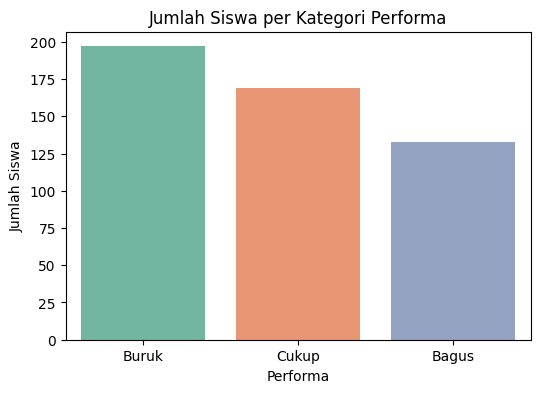

In [5]:
# Visualisasi Kategori Performa
plt.figure(figsize=(6,4))
sns.countplot(x='performa', hue='performa', data=df, palette='Set2', legend=False)
plt.title('Jumlah Siswa per Kategori Performa')
plt.xlabel('Performa')
plt.ylabel('Jumlah Siswa')
plt.show()

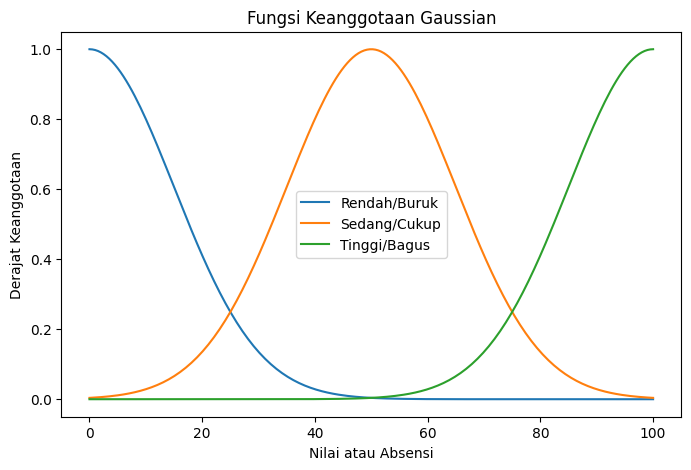

In [6]:
# Fungsi Keanggotaan Gaussian
def gaussian_membership(x, center, sigma):
    return np.exp(-0.5 * ((x - center) / sigma) ** 2)
x = np.linspace(0, 100, 200)
plt.figure(figsize=(8,5))
plt.plot(x, [gaussian_membership(i, 0, 15) for i in x], label='Rendah/Buruk')
plt.plot(x, [gaussian_membership(i, 50, 15) for i in x], label='Sedang/Cukup')
plt.plot(x, [gaussian_membership(i, 100, 15) for i in x], label='Tinggi/Bagus')
plt.title('Fungsi Keanggotaan Gaussian')
plt.xlabel('Nilai atau Absensi')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.show()

In [7]:


def mamdani(absensi, nilai):
    
    absensi_rendah = gaussian_membership(absensi, 0, 15)
    absensi_sedang = gaussian_membership(absensi, 50, 15)
    absensi_tinggi = gaussian_membership(absensi, 100, 15)

    nilai_rendah = gaussian_membership(nilai, 0, 15) 
    nilai_sedang = gaussian_membership(nilai, 50, 15) 
    nilai_tinggi = gaussian_membership(nilai, 100, 15) 
    
    PERFORMA_BURUK_CRISP = 0.0 
    PERFORMA_CUKUP_CRISP = 0.5 
    PERFORMA_BAGUS_CRISP = 1.0 

    PERFORMA_BURUK_CRISP = 0.0
    PERFORMA_CUKUP_CRISP = 0.5
    PERFORMA_BAGUS_CRISP = 1.0 
    
    alpha_rule1 = min(absensi_rendah, nilai_rendah)
    alpha_rule2 = min(absensi_rendah, nilai_sedang)
    alpha_rule3 = min(absensi_rendah, nilai_tinggi)
    alpha_rule4 = min(absensi_sedang, nilai_rendah)
    alpha_rule5 = min(absensi_sedang, nilai_sedang)
    alpha_rule6 = min(absensi_sedang, nilai_tinggi)
    alpha_rule7 = min(absensi_tinggi, nilai_rendah)
    alpha_rule8 = min(absensi_tinggi, nilai_sedang)
    alpha_rule9 = min(absensi_tinggi, nilai_tinggi)

    agg_buruk = max(alpha_rule1, alpha_rule2, alpha_rule4)     
    agg_cukup = max(alpha_rule3, alpha_rule5, alpha_rule7) 
    agg_bagus = max(alpha_rule6, alpha_rule8, alpha_rule9)

    numerator = (alpha_rule1 * PERFORMA_BURUK_CRISP) + \
                (alpha_rule2 * PERFORMA_BAGUS_CRISP) + \
                (alpha_rule3 * PERFORMA_CUKUP_CRISP)
    
    denominator = agg_buruk + agg_cukup + agg_bagus

    if denominator == 0:
        
        return PERFORMA_CUKUP_CRISP 
    else:
        return numerator / denominator


def sugeno(absensi, nilai):
     
    absensi_rendah = gaussian_membership(absensi, 0, 15)
    absensi_sedang = gaussian_membership(absensi, 50, 15)
    absensi_tinggi = gaussian_membership(absensi, 100, 15)

    nilai_rendah = gaussian_membership(nilai, 0, 15)
    nilai_sedang = gaussian_membership(nilai, 50, 15)
    nilai_tinggi = gaussian_membership(nilai, 100, 15)

    OUTPUT_BURUK = 0.0
    OUTPUT_CUKUP = 0.5
    OUTPUT_BAGUS = 1.0

    alpha_rule1 = min(absensi_rendah, nilai_rendah)
    alpha_rule2 = min(absensi_rendah, nilai_sedang)
    alpha_rule3 = min(absensi_rendah, nilai_tinggi)
    alpha_rule4 = min(absensi_sedang, nilai_rendah)
    alpha_rule5 = min(absensi_sedang, nilai_sedang)
    alpha_rule6 = min(absensi_sedang, nilai_tinggi)
    alpha_rule7 = min(absensi_tinggi, nilai_rendah)
    alpha_rule8 = min(absensi_tinggi, nilai_sedang)
    alpha_rule9 = min(absensi_tinggi, nilai_tinggi)
    
    numerator = (alpha_rule1 * OUTPUT_BURUK) + \
                (alpha_rule2 * OUTPUT_BURUK) + \
                (alpha_rule3 * OUTPUT_CUKUP) + \
                (alpha_rule4 * OUTPUT_BURUK) + \
                (alpha_rule5 * OUTPUT_CUKUP) + \
                (alpha_rule6 * OUTPUT_BAGUS) + \
                (alpha_rule7 * OUTPUT_CUKUP) + \
                (alpha_rule8 * OUTPUT_BAGUS) + \
                (alpha_rule9 * OUTPUT_BAGUS)
    
    denominator = alpha_rule1 + alpha_rule2 + alpha_rule3 + \
                  alpha_rule4 + alpha_rule5 + alpha_rule6 + \
                  alpha_rule7 + alpha_rule8 + alpha_rule9

    if denominator == 0:
        return OUTPUT_CUKUP
    else:
        return numerator / denominator


# --- Fungsi untuk memetakan output numerik ke label kategori ---
def map_numeric_to_label(numeric_score, threshold_buruk=0.33, threshold_bagus=0.66):
    """
    Memetakan skor numerik hasil defuzzifikasi ke label kategori performa.
    Thresholds dapat disesuaikan untuk tuning.
    """
    if numeric_score < threshold_buruk:
        return "Buruk"
    elif numeric_score > threshold_bagus:
        return "Bagus"
    else:
        return "Cukup"


In [8]:
# --- Fungsi untuk evaluasi model ---
def evaluate_model(predictions, actual):
    """
    Mengevaluasi kinerja model menggunakan Accuracy dan F1-Score.
    """
    accuracy = accuracy_score(actual, predictions)
    # F1-score dengan 'weighted' average cocok untuk kelas yang mungkin tidak seimbang
    f1 = f1_score(actual, predictions, average='weighted', labels=['Buruk', 'Cukup', 'Bagus'], zero_division=1)
    return accuracy, f1

# Menambahkan kolom 'predictions' dengan menggunakan Mamdani atau Sugeno
df['predictions_mamdani_numeric'] = df.apply(lambda row: mamdani(row['absensi'], row['nilai']), axis=1)
df['predictions_sugeno_numeric'] = df.apply(lambda row: sugeno(row['absensi'], row['nilai']), axis=1)

# Evaluasi menggunakan Mamdani
df['predictions_mamdani_label'] = df['predictions_mamdani_numeric'].apply(map_numeric_to_label)
accuracy_mamdani, f1_mamdani = evaluate_model(df['predictions_mamdani_label'], df['performa'])
print(f"Evaluasi Mamdani:\nAccuracy: {accuracy_mamdani}\nF1-Score: {f1_mamdani}")

# Evaluasi menggunakan Sugeno
# Karena output Sugeno berupa angka, kita harus mengkonversinya ke kategori yang sesuai untuk perbandingan
def map_sugeno_discrete_to_label(value):
    if value == 0.0: return "Buruk"
    elif value == 1.0: return "Bagus"
    else: return "Cukup" # Asumsi 0.5 atau lainnya adalah Cukup
df['predictions_sugeno_label'] = df['predictions_sugeno_numeric'].apply(map_sugeno_discrete_to_label)
accuracy_sugeno, f1_sugeno = evaluate_model(df['predictions_sugeno_label'], df['performa'])
print(f"\nEvaluasi Sugeno:\nAccuracy: {accuracy_sugeno}\nF1-Score: {f1_sugeno}")


Evaluasi Mamdani:
Accuracy: 0.28857715430861725
F1-Score: 0.24533669137399997

Evaluasi Sugeno:
Accuracy: 0.33867735470941884
F1-Score: 0.17136668546674189


In [9]:
# Menampilkan perbandingan hasil antara Mamdani dan Sugeno
print("\nPerbandingan Kinerja:")
print(f"Accuracy Mamdani: {accuracy_mamdani} | Accuracy Sugeno: {accuracy_sugeno}")
print(f"F1-Score Mamdani: {f1_mamdani} | F1-Score Sugeno: {f1_sugeno}")

# Kesimpulan berdasarkan evaluasi
if accuracy_mamdani > accuracy_sugeno:
    print("\nMetode Mamdani lebih baik berdasarkan akurasi.")
elif accuracy_mamdani < accuracy_sugeno:
    print("\nMetode Sugeno lebih baik berdasarkan akurasi.")
else:
    print("\nKedua metode memiliki akurasi yang sama.")


Perbandingan Kinerja:
Accuracy Mamdani: 0.28857715430861725 | Accuracy Sugeno: 0.33867735470941884
F1-Score Mamdani: 0.24533669137399997 | F1-Score Sugeno: 0.17136668546674189

Metode Sugeno lebih baik berdasarkan akurasi.
